In [2]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras import layers

## Loading MNIST

In [3]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train = x_train/255
x_test = x_test/255

In [19]:
print(x_train.shape)
print(y_train.shape)

(60000, 28, 28)
(60000,)


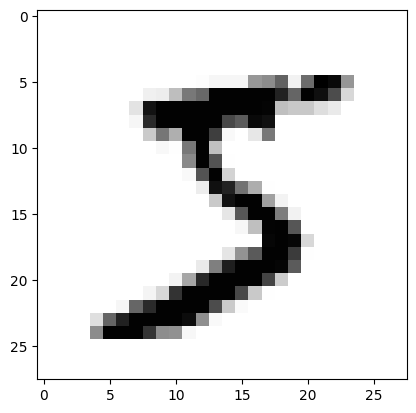

In [21]:
plt.imshow(x_train[0], cmap='Greys')

## Training with one-hot labels

In [6]:
model_lr = tf.keras.models.Sequential([
        layers.Input(x_train.shape[1:]),
        layers.Flatten(),
        layers.Dense(10, activation='softmax')
    ])
model_lr.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model_lr.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 10)                7850      
                                                                 
Total params: 7850 (30.66 KB)
Trainable params: 7850 (30.66 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [7]:
y_onehot_train = tf.one_hot(y_train, 10)
model_lr.fit(x_train, y_onehot_train)

1875/1875 [==============================] - 7s 3ms/step - loss: 0.4710 - accuracy: 0.8768


## Training with sparse labels

In [8]:
model_lr = tf.keras.models.Sequential([
        layers.Input(x_train.shape[1:]),
        layers.Flatten(),
        layers.Dense(10, activation='softmax')
    ])
model_lr.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model_lr.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                7850      
                                                                 
Total params: 7850 (30.66 KB)
Trainable params: 7850 (30.66 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [9]:
# model_lr.fit(x_train, y_train)

In [10]:
history_lr = model_lr.fit(x_train, y_train, epochs=10, batch_size=128, validation_data=(x_test, y_test), verbose=False)

## Review Traning Results

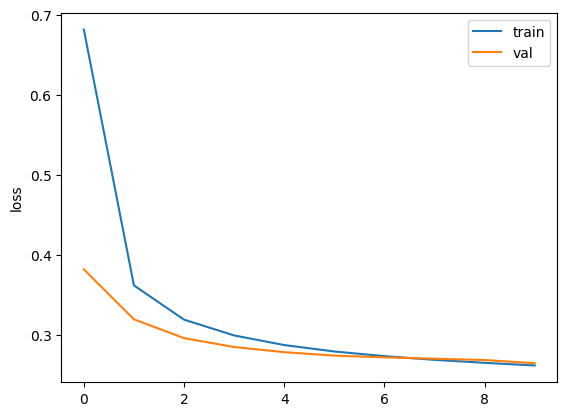

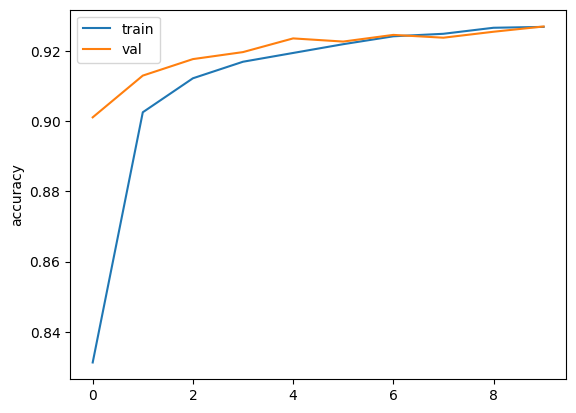

In [11]:
plt.plot(history_lr.history['loss'], label='train')
plt.plot(history_lr.history['val_loss'], label='val')
plt.ylabel('loss')
plt.legend()
plt.show()

plt.plot(history_lr.history['accuracy'], label='train')
plt.plot(history_lr.history['val_accuracy'], label='val')
plt.ylabel('accuracy')
plt.legend()
plt.show()

In [12]:
model_lr.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.2648 - accuracy: 0.9270


[0.2647985517978668, 0.9269999861717224]

1/1 [==============================] - 0s 79ms/step
[6.2942613e-06 1.0842922e-10 1.9727740e-05 4.0393663e-03 5.0287650e-07
 1.7240149e-05 1.3422315e-09 9.9561113e-01 1.6959662e-05 2.8881445e-04]  =>  7


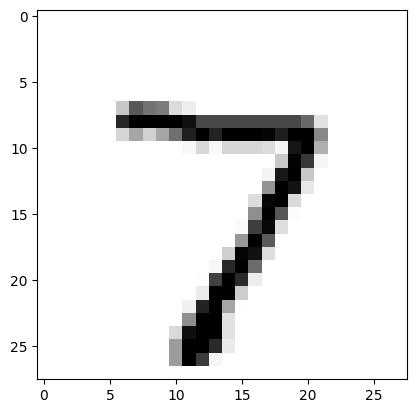

[2.5589741e-04 4.7453304e-06 9.9219704e-01 4.8790721e-04 5.5260202e-13
 2.9546581e-03 4.0013059e-03 4.6671490e-15 9.8463606e-05 1.7962498e-11]  =>  2


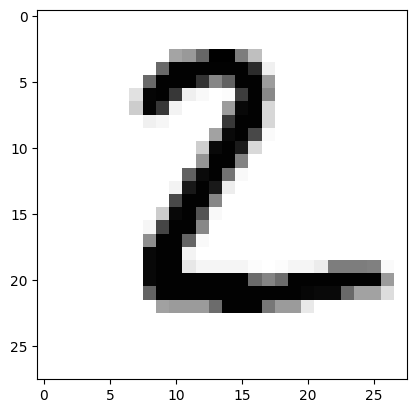

[6.2326512e-06 9.7427046e-01 1.2509640e-02 3.1931798e-03 2.1335983e-04
 8.6332235e-04 1.4023141e-03 2.3401361e-03 4.8535778e-03 3.4773137e-04]  =>  1


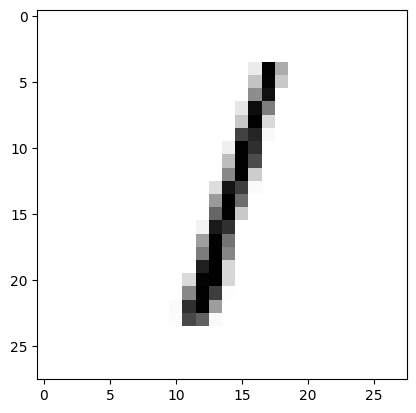

[9.9932921e-01 1.0379837e-10 2.1730730e-04 1.0206027e-05 6.6877924e-08
 1.2692164e-04 2.2384711e-04 4.0495786e-05 3.0643212e-05 2.1307118e-05]  =>  0


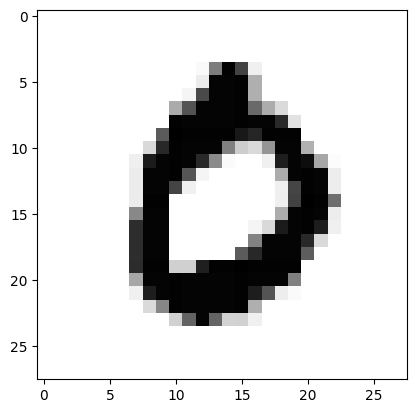

[3.11138137e-04 7.11468033e-07 2.72137462e-03 5.84474074e-05
 9.67242301e-01 1.11263296e-04 2.07298831e-03 3.25927697e-03
 3.65725067e-03 2.05652025e-02]  =>  4


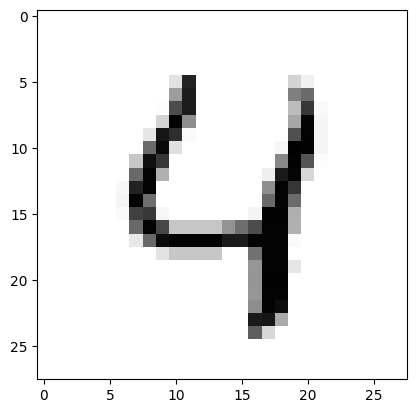

In [13]:
probs = model_lr.predict(x_test[:5])
preds = np.argmax(probs, axis=1)
for i in range(5):
    print(probs[i], " => ", preds[i])
    plt.imshow(x_test[i], cmap="Greys")
    plt.show()

In [14]:
model_lr.predict(x_test[18].reshape(1,28,28))

1/1 [==============================] - 0s 33ms/step


array([[7.44283752e-05, 1.12722082e-05, 1.06764466e-01, 8.15931082e-01,
        1.97710164e-04, 3.56802493e-02, 1.19516021e-02, 2.99845797e-05,
        2.93494146e-02, 9.77299442e-06]], dtype=float32)

In [15]:
model_lr.predict(x_test[18:19])

1/1 [==============================] - 0s 37ms/step


array([[7.44283752e-05, 1.12722082e-05, 1.06764466e-01, 8.15931082e-01,
        1.97710164e-04, 3.56802493e-02, 1.19516021e-02, 2.99845797e-05,
        2.93494146e-02, 9.77299442e-06]], dtype=float32)

## Adding Model Complexity

In [16]:
model_mlp = tf.keras.models.Sequential([
        layers.Input(x_train.shape[1:]),
        layers.Flatten(),
        layers.Dense(64, activation='elu'),
        layers.Dense(64, activation='elu'),
        layers.Dense(10, activation='softmax')
    ])
model_mlp.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model_mlp.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 64)                50240     
                                                                 
 dense_3 (Dense)             (None, 64)                4160      
                                                                 
 dense_4 (Dense)             (None, 10)                650       
                                                                 
Total params: 55050 (215.04 KB)
Trainable params: 55050 (215.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [17]:
history_mlp = model_mlp.fit(x_train, y_train, epochs=10, batch_size=128, validation_data=(x_test, y_test), verbose=False)

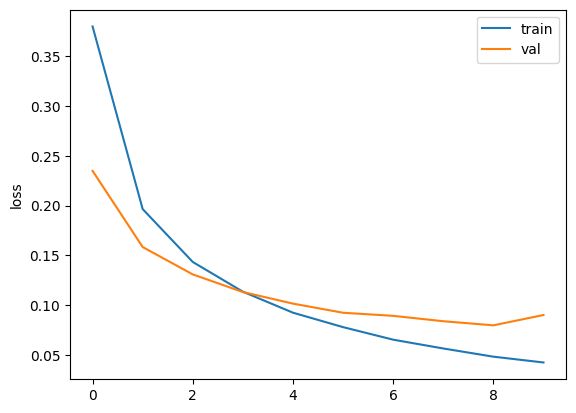

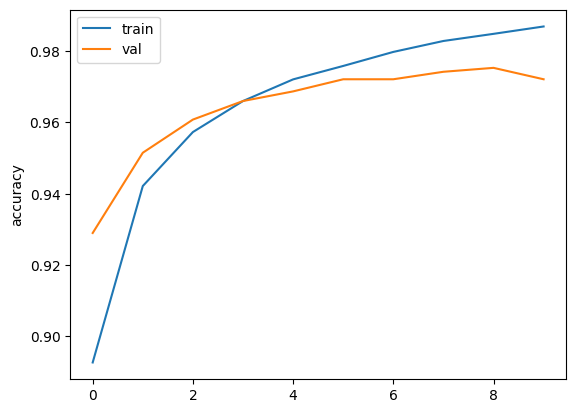

In [18]:
plt.plot(history_mlp.history['loss'], label='train')
plt.plot(history_mlp.history['val_loss'], label='val')
plt.ylabel('loss')
plt.legend()
plt.show()

plt.plot(history_mlp.history['accuracy'], label='train')
plt.plot(history_mlp.history['val_accuracy'], label='val')
plt.ylabel('accuracy')
plt.legend()
plt.show()